In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [98]:
df=pd.read_excel('data_model.xlsx',index_col=0)
df.head()

,type,latitude,longitude,power backup,lift,furninture status,bathrooms,status of building,location,rate persqft,area insqft,construction status,property type,Bhk,price(L)
0,1 BHK Apartment,17.403968,78.483456,yes,yes,Furnished,1,New,Himayat Nagar,1846,650,Under Construction,Apartment,1,12.00
1,1 BHK Apartment,17.463173,78.286484,yes,yes,Unfurnished,2,New,Tellapur,2406,1205,Under Construction,Apartment,1,28.99
2,1 BHK Apartment,17.489849,78.293930,yes,yes,Unfurnished,2,New,BHEL,2406,1205,Under Construction,Apartment,1,28.99
3,1 BHK Apartment,17.536715,78.362610,yes,yes,Unfurnished,1,Resale,Whisper Valley,2881,590,Ready to move,Apartment,1,17.00
4,1 BHK Apartment,17.497248,78.503426,yes,yes,Unfurnished,2,New,Alwal,2406,1205,Under Construction,Apartment,1,28.99


In [99]:
df.shape

(13597, 15)

In [100]:
df.drop(labels=['type','location','rate persqft'],axis=1,inplace=True)

In [101]:
df.shape

(13597, 12)

In [102]:
df

,latitude,longitude,power backup,lift,furninture status,bathrooms,status of building,area insqft,construction status,property type,Bhk,price(L)
0,17.403968,78.483456,yes,yes,Furnished,1,New,650,Under Construction,Apartment,1,12.00
1,17.463173,78.286484,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
2,17.489849,78.293930,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
3,17.536715,78.362610,yes,yes,Unfurnished,1,Resale,590,Ready to move,Apartment,1,17.00
4,17.497248,78.503426,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
5,17.534964,78.402245,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
6,17.485710,78.396866,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
7,17.391747,78.495956,yes,yes,Unfurnished,2,Resale,810,Ready to move,IndependentHouse,1,125.00
8,17.526516,78.358185,yes,yes,Semi-Furnished,2,Resale,1025,Ready to move,Apartment,1,27.00
9,17.402847,78.497955,yes,yes,Semi-Furnished,2,Resale,1000,Ready to move,Apartment,1,60.00


In [103]:
df.columns

Index(['latitude', 'longitude', 'power backup', 'lift', 'furninture status',
       'bathrooms', 'status of building', 'area insqft', 'construction status',
       'property type', 'Bhk', 'price(L)'],
      dtype='object')

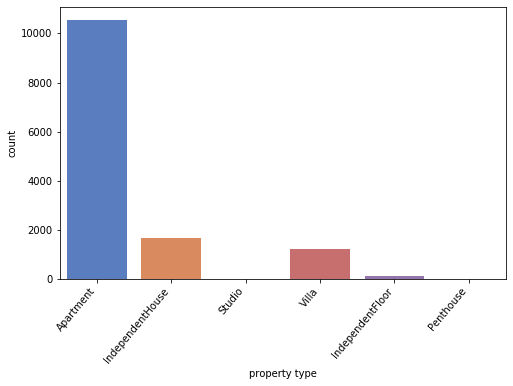

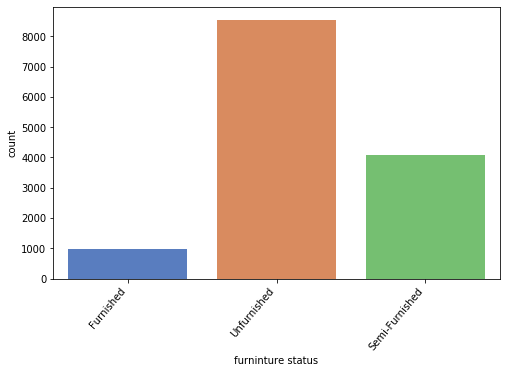

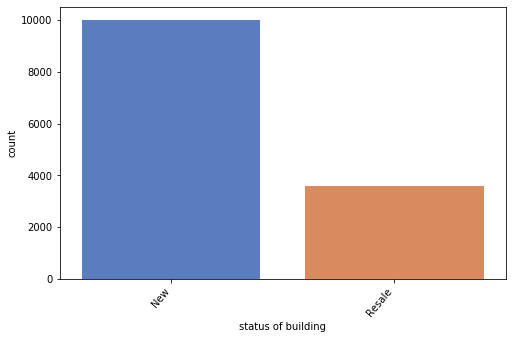

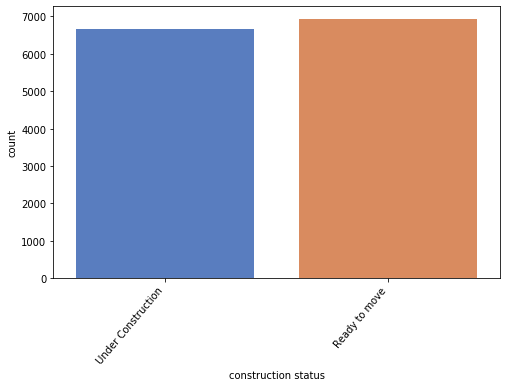

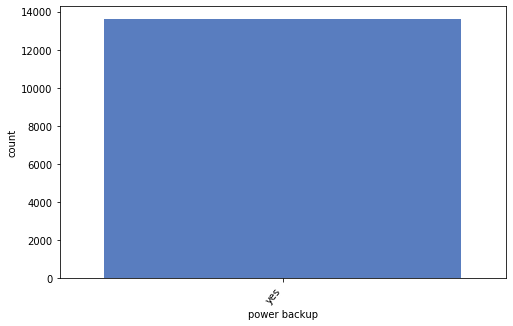

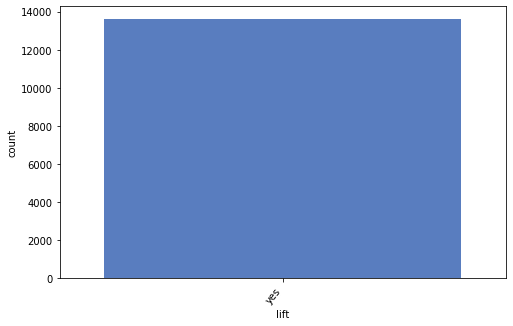

In [104]:
l1 = ['property type','furninture status','status of building','construction status','power backup','lift']
for i in l1:
    fig,ax=plt.subplots(figsize=(8,5))
    sns.countplot(df[i],palette='muted',ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')
    plt.show()
    
    
    

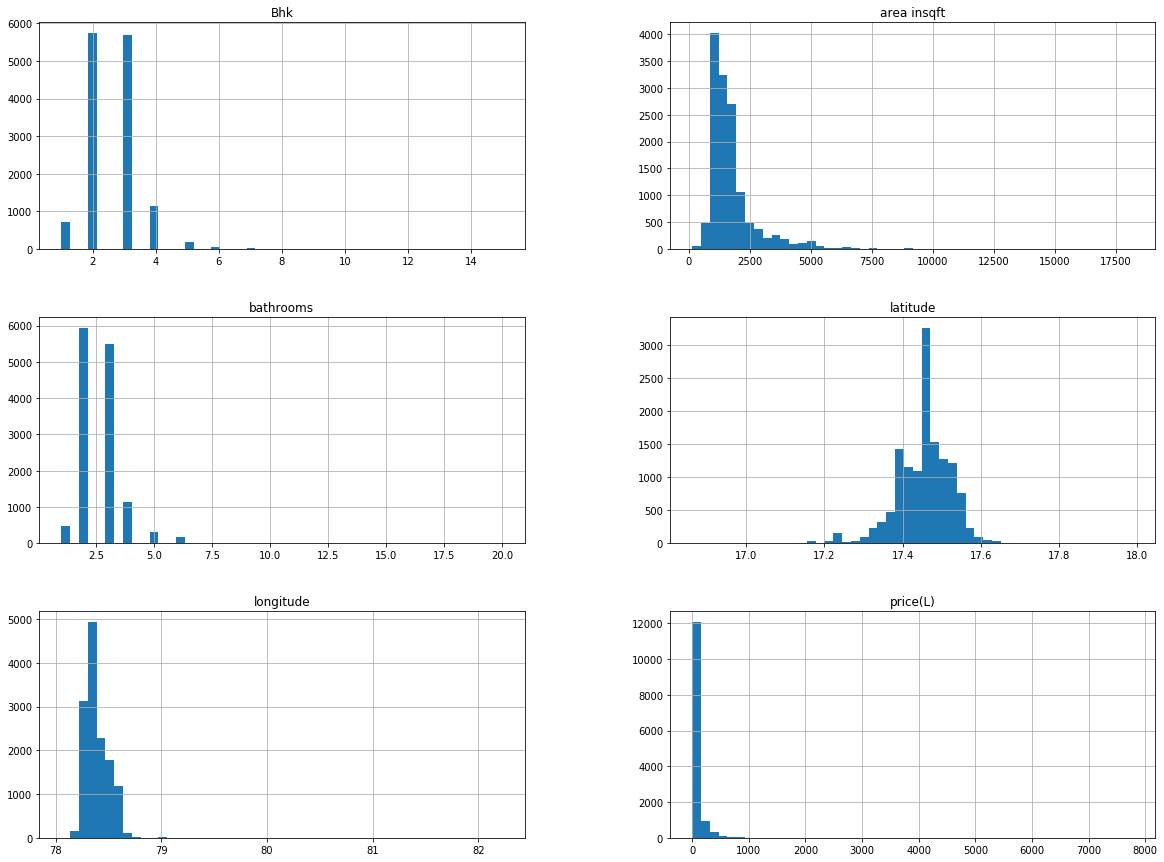

In [105]:
df.hist(bins=50, figsize=(20,15))
plt.show()

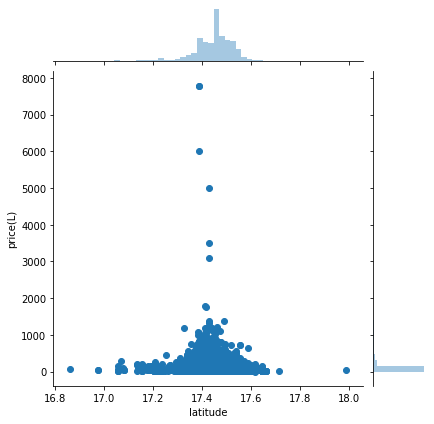

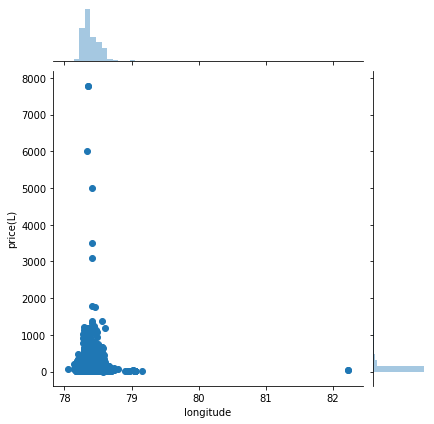

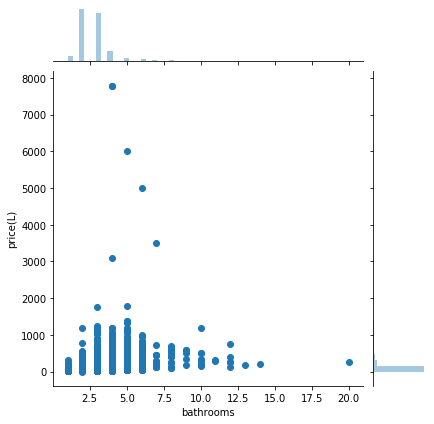

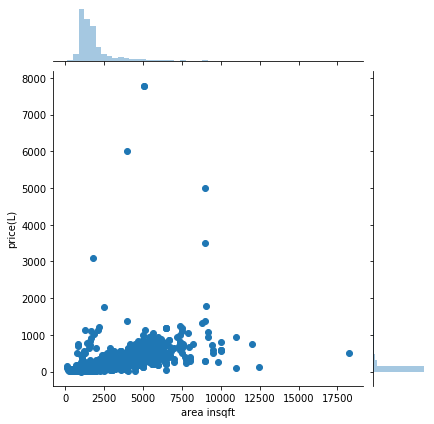

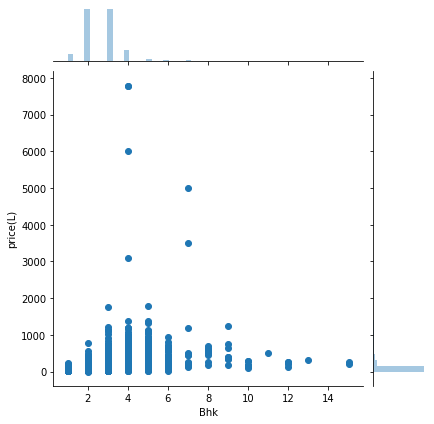

In [106]:
lst=['latitude','longitude','bathrooms','area insqft','Bhk']
for i in lst:
    sns.jointplot(df[i],df['price(L)'],data=df)
    plt.show()

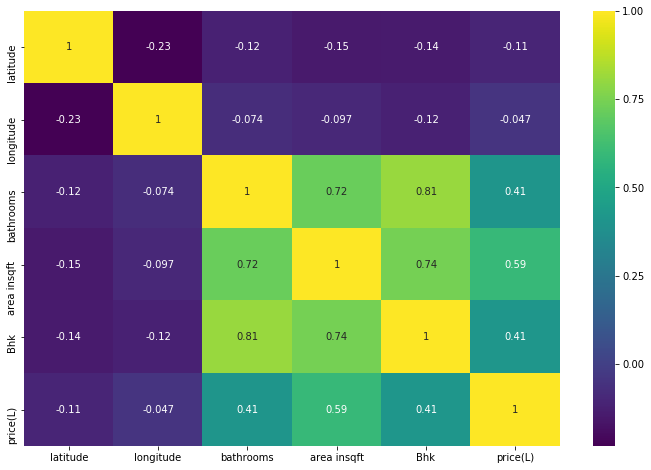

In [107]:
corr = df.corr()
fig,ax= plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(corr,annot=True, cmap="viridis")

In [108]:
df.corr()

,latitude,longitude,bathrooms,area insqft,Bhk,price(L)
latitude,1.000000,-0.231475,-0.119787,-0.148444,-0.142999,-0.106215
longitude,-0.231475,1.000000,-0.073796,-0.096721,-0.118467,-0.046708
bathrooms,-0.119787,-0.073796,1.000000,0.718921,0.811455,0.408883
area insqft,-0.148444,-0.096721,0.718921,1.000000,0.741885,0.591720
Bhk,-0.142999,-0.118467,0.811455,0.741885,1.000000,0.413564
price(L),-0.106215,-0.046708,0.408883,0.591720,0.413564,1.000000


In [109]:
df.head()

,latitude,longitude,power backup,lift,furninture status,bathrooms,status of building,area insqft,construction status,property type,Bhk,price(L)
0,17.403968,78.483456,yes,yes,Furnished,1,New,650,Under Construction,Apartment,1,12.00
1,17.463173,78.286484,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
2,17.489849,78.293930,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99
3,17.536715,78.362610,yes,yes,Unfurnished,1,Resale,590,Ready to move,Apartment,1,17.00
4,17.497248,78.503426,yes,yes,Unfurnished,2,New,1205,Under Construction,Apartment,1,28.99


In [110]:
df = df[['latitude', 'longitude', 'power backup', 'lift',
       'furninture status', 'bathrooms', 'status of building',
        'area insqft', 'construction status',
       'property type', 'Bhk','price(L)']]

In [111]:
df.head(1)

,latitude,longitude,power backup,lift,furninture status,bathrooms,status of building,area insqft,construction status,property type,Bhk,price(L)
0,17.403968,78.483456,yes,yes,Furnished,1,New,650,Under Construction,Apartment,1,12.0


In [112]:
df1=pd.get_dummies(df, drop_first= True)

In [113]:
df1.head(5)

,latitude,longitude,bathrooms,area insqft,Bhk,price(L),furninture status_Semi-Furnished,furninture status_Unfurnished,status of building_Resale,construction status_Under Construction,property type_IndependentFloor,property type_IndependentHouse,property type_Penthouse,property type_Studio,property type_Villa
0,17.403968,78.483456,1,650,1,12.00,0,0,0,1,0,0,0,0,0
1,17.463173,78.286484,2,1205,1,28.99,0,1,0,1,0,0,0,0,0
2,17.489849,78.293930,2,1205,1,28.99,0,1,0,1,0,0,0,0,0
3,17.536715,78.362610,1,590,1,17.00,0,1,1,0,0,0,0,0,0
4,17.497248,78.503426,2,1205,1,28.99,0,1,0,1,0,0,0,0,0


In [114]:
df1.shape

(13597, 15)

In [115]:
len(df1.columns)

15

# Build a Model

In [116]:
df1.rename(columns={'area insqft': 'areainsqft',
                   'furninture status_Semi-Furnished' :'furniture_Semi',
                   'furninture status_Unfurnished' :'furniture_Unfurnished',
                   'status of building_Resale': 'building_Resale',
                   'construction status_Under Construction' : 'Under_Construction',
                   'property type_IndependentFloor' : 'IndependentFloor',
                   'property type_IndependentHouse' : 'IndependentHouse',
                   'property type_Penthouse' : 'Penthouse',
                   'property type_Studio' : 'Studio',
                   'property type_Villa'  : 'Villa',
                   'price(L)' : 'price'},inplace=True)



In [117]:
df1.head(3)

,latitude,longitude,bathrooms,areainsqft,Bhk,price,furniture_Semi,furniture_Unfurnished,building_Resale,Under_Construction,IndependentFloor,IndependentHouse,Penthouse,Studio,Villa
0,17.403968,78.483456,1,650,1,12.00,0,0,0,1,0,0,0,0,0
1,17.463173,78.286484,2,1205,1,28.99,0,1,0,1,0,0,0,0,0
2,17.489849,78.293930,2,1205,1,28.99,0,1,0,1,0,0,0,0,0


In [118]:
df1.columns

Index(['latitude', 'longitude', 'bathrooms', 'areainsqft', 'Bhk', 'price',
       'furniture_Semi', 'furniture_Unfurnished', 'building_Resale',
       'Under_Construction', 'IndependentFloor', 'IndependentHouse',
       'Penthouse', 'Studio', 'Villa'],
      dtype='object')

In [119]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [120]:
# model with all features
# y=using stats model
model_all=sm.OLS.from_formula('price~latitude+longitude+bathrooms+Bhk+areainsqft+furniture_Semi+furniture_Unfurnished+building_Resale+Under_Construction+IndependentFloor+IndependentHouse+Penthouse+Studio+Villa',data=df1).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     538.6
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:35:42   Log-Likelihood:                -85463.
No. Observations:               13597   AIC:                         1.710e+05
Df Residuals:                   13582   BIC:                         1.711e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2196.16

In [121]:
df1.columns

Index(['latitude', 'longitude', 'bathrooms', 'areainsqft', 'Bhk', 'price',
       'furniture_Semi', 'furniture_Unfurnished', 'building_Resale',
       'Under_Construction', 'IndependentFloor', 'IndependentHouse',
       'Penthouse', 'Studio', 'Villa'],
      dtype='object')

In [122]:
data = df1[['latitude', 'longitude', 'bathrooms', 'areainsqft',
       'Bhk','furniture_Semi','furniture_Unfurnished', 'building_Resale',
       'Under_Construction', 'IndependentFloor', 'IndependentHouse',
       'Penthouse', 'Studio', 'Villa','price',]]

In [123]:
data.shape

(13597, 15)

In [124]:
X = data.iloc[:,:14]
Y = data.iloc[:,-1] 

In [125]:
Y.shape,X.shape

((13597,), (13597, 14))

In [126]:
#no of features
nof_list=np.arange(1,15)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 14
Score with 14 features: 0.515602


In [127]:
reg = LassoCV()
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 97.551175
Best score using built-in LassoCV: 0.350132


In [128]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 13 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

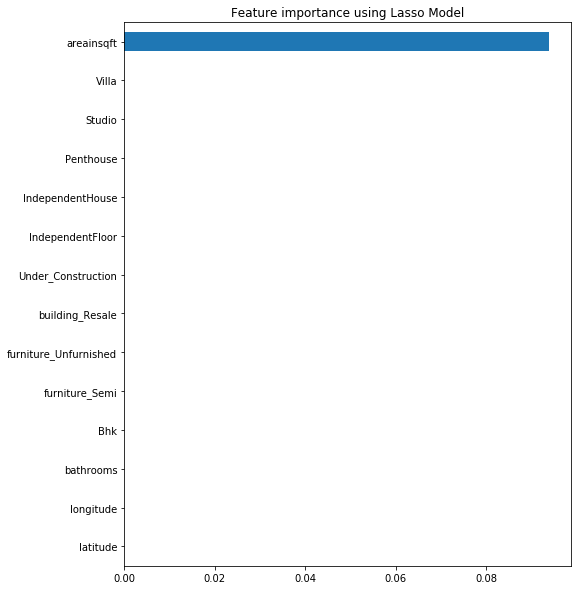

In [129]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [130]:
x2=X

In [131]:
x2.shape

(13597, 14)

# Feature Engineering
- backward elimination
- build full model and drop p-values(>0.025)

In [132]:
Xnew=x2
Xnew.head(1)

,latitude,longitude,bathrooms,areainsqft,Bhk,furniture_Semi,furniture_Unfurnished,building_Resale,Under_Construction,IndependentFloor,IndependentHouse,Penthouse,Studio,Villa
0,17.403968,78.483456,1,650,1,0,0,0,1,0,0,0,0,0


In [133]:
model=sm.OLS(Y,Xnew).fit()
while model.pvalues.sort_values(ascending=False)[0]>=0.025:
    model=sm.OLS(Y,Xnew).fit()
    high=model.pvalues.sort_values(ascending=False).index[0]
    Xnew.drop(high,axis=1,inplace=True)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.537
Model:                            OLS   Adj. R-squared (uncentered):              0.537
Method:                 Least Squares   F-statistic:                              3157.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):                        0.00
Time:                        22:35:44   Log-Likelihood:                         -85471.
No. Observations:               13597   AIC:                                  1.710e+05
Df Residuals:                   13592   BIC:                                  1.710e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
vif= pd.DataFrame()
vif['features']=Xnew.keys()
vif['VIF Score']=[variance_inflation_factor(Xnew.values,i) for i in range(4)]
vif

,features,VIF Score
0,latitude,4.381790
1,areainsqft,4.648419
2,building_Resale,1.359487
3,Villa,1.303539


# Sci-Kit Learn

In [136]:
# splitting data into two parts : training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Xnew,Y,test_size=0.2)

In [137]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10877, 4), (2720, 4), (10877,), (2720,))

In [138]:
# Training model with training data
from sklearn.linear_model import LinearRegression

In [139]:
model=LinearRegression()

In [140]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
y_pred=model.predict(x_test)

In [142]:
y_pred

array([110.93971184, 186.45762428, 153.66568698, ...,  68.2104952 ,
        54.12921242,  87.41779798])

In [143]:
model.intercept_,model.coef_

(705.056211657067,
 array([-44.21213222,   0.09224541,  18.51744244,  34.7620814 ]))

**ANNOVA(Analysis of Variance)**
> F_statistics = $\frac{\frac{ssr}{dfssr}}{\frac{sse}{dfsse}}$
- dfssr=k
- dfsse=n-1-k
- ssr=sum(y_pred-y_pred.mean)
- sse=sum(y_pred-y_actual)^2
- n=no. of samples
- k=no. of independent values

In [144]:
# Always test data
n = len(x_test)
k = x_test.shape[1]
df_ssr = k
df_sse = n-k-1

In [145]:
# Annova
ssr = np.sum((np.square(y_pred-y_pred.mean())))

In [146]:
sse = np.sum((np.square(y_pred-y_test)))

In [147]:
sst = sse+ssr
#sst = np.sum((np.square(y_test-y_test.mean())))

In [148]:
ssr,sse,sst

(27679130.22562272, 11297220.807079637, 38976351.03270236)

$ R^2$
- Explained Variance

In [149]:
rsquare = ssr/sst
rsquare

0.7101519124352887

## Fstats

In [150]:
Fstats = (ssr/df_ssr)/(sse/df_sse)
Fstats

1662.9939311151668

In [151]:
from scipy import stats

In [152]:
# f : two tail test
prob=0.025
stats.f.ppf(prob,df_ssr,df_sse)

0.1210708554211676

In [153]:
prob=0.975
stats.f.ppf(prob,df_ssr,df_sse)

2.7905171228462082

In [154]:
# prob 
stats.f.cdf(Fstats,df_ssr,df_sse)

0.9999999999999999

In [155]:
1-stats.f.cdf(Fstats,df_ssr,df_sse)

1.1102230246251565e-16

## Residual Analysis
- Homoscarsidy
- Hetro (normality test)

In [156]:
residuals = y_test-y_pred

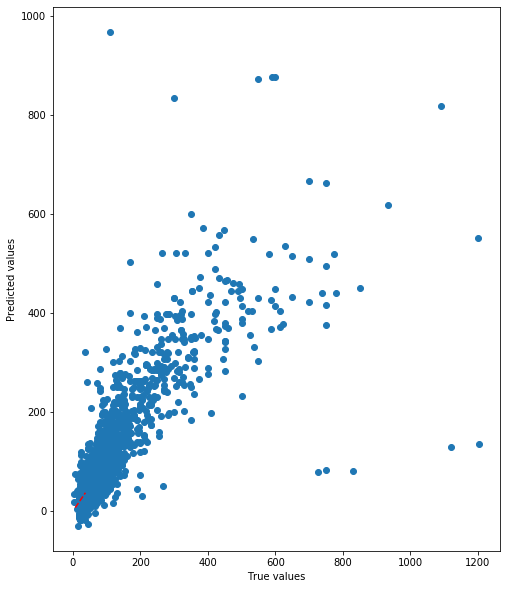

In [157]:
# Homo
plt.scatter(y_test,y_pred)
plt.xlabel("True values")
plt.plot([7,37],[7,37],'r--')
plt.ylabel("Predicted values")
plt.show()

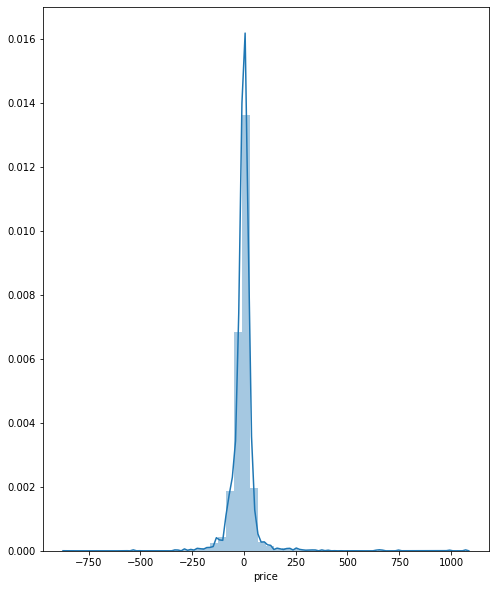

In [158]:
sns.distplot(residuals)
plt.show()

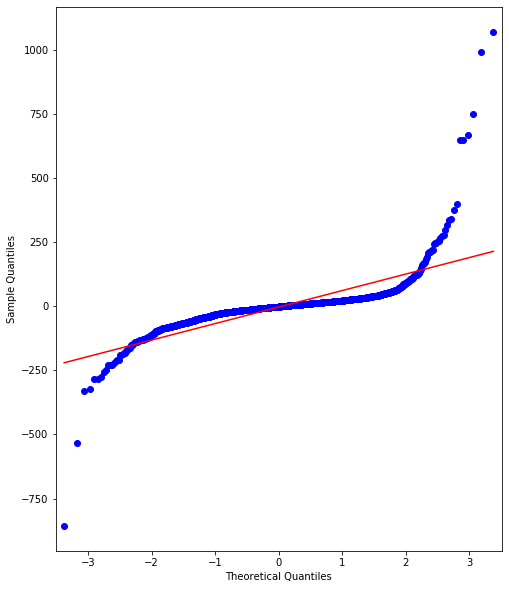

In [159]:
fig=sm.graphics.qqplot(residuals,line='s')

In [160]:
stats.shapiro(residuals)

(0.585749626159668, 0.0)

In [161]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [162]:
df1

,Actual,Predicted
8631,91.99,110.939712
15430,165.00,186.457624
10480,113.93,153.665687
10195,98.98,105.906450
12865,97.45,105.316154
9245,125.36,88.581694
13492,103.00,135.148245
14634,136.00,217.674896
10304,97.99,119.286736
2018,63.99,55.058653


In [163]:
y_pred_train=model.predict(x_train)
y_pred_train

array([ 41.5451645 , 135.35644055,  80.78063659, ...,  93.88624955,
       136.69423837,  76.71107156])

In [164]:
residulas_train = y_train-y_pred_train
residulas_train

2163      -12.045165
8285        4.633559
10837     -53.580637
9005      -31.814555
4859       11.498767
7914      -12.131148
12848     -22.904759
10364     -21.472480
13336      -7.052743
11985     -46.354005
4439       -7.762571
3733       27.573136
9683      -29.049310
5537      -14.149694
3867       -3.275348
11550      11.498199
2017        5.396099
8740      -58.340792
38         -8.277189
14499    5641.427434
1621      -21.721950
2109        1.917896
11760      -2.745449
13384       9.285240
6780        9.023952
13772     -17.826450
7902      -33.549716
14827     -92.077981
1016        8.660045
2298       10.906844
            ...     
3588        3.396422
733        -5.211981
3813       12.626107
13783     -13.391851
9627      -21.218323
4895       -4.682035
12666       2.886021
6965        6.876664
1333       16.944571
7330      -13.834417
10605       3.497584
8770      -42.661789
8943       98.610065
3144      -22.398329
8002       42.117141
15565      83.964481
14936     -73

In [165]:
def zscore(x):
    std=pd.Series(x).std()
    z=(x-x.mean())/std
    return z

In [166]:
y_pred_stand = zscore(y_pred_train)
y_pred_stand

array([-0.60671227,  0.34242081, -0.20974843, ..., -0.07715274,
        0.35595595, -0.25092214])

In [167]:
residuals_normalized = zscore(residulas_train)
residuals_normalized_square=np.square(residuals_normalized)

In [168]:
# Leverage
n = len(x_train)
h = (np.square(y_pred_stand)+1)/n

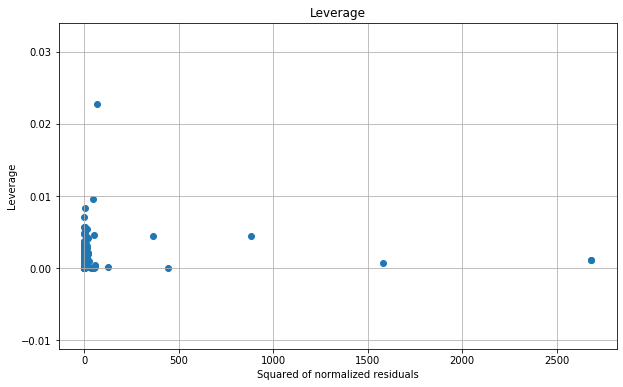

In [169]:
plt.figure(figsize=(10,6))
plt.scatter(residuals_normalized_square,h)
plt.xlabel('Squared of normalized residuals')
plt.ylabel('Leverage')
plt.title('Leverage')
plt.grid()
plt.show()

In [170]:
summary_frame = pd.DataFrame()

In [171]:
summary_frame['y_train']=y_train
summary_frame['y_train_pred']=y_pred_train
summary_frame['residual']=residulas_train
summary_frame['normalized residuals']=residuals_normalized
summary_frame['leverage h']=h

In [172]:
summary_frame.head()

,y_train,y_train_pred,residual,normalized residuals,leverage h
2163,29.50,41.545165,-12.045165,-0.084929,0.000126
8285,139.99,135.356441,4.633559,0.032671,0.000103
10837,27.20,80.780637,-53.580637,-0.377789,0.000096
9005,35.44,67.254555,-31.814555,-0.224320,0.000103
4859,28.50,17.001233,11.498767,0.081076,0.000159


In [173]:
num = summary_frame['residual']**2
d1 = num/(k*summary_frame['residual'].var())

In [174]:
d2 = summary_frame['leverage h']/np.square((1-summary_frame['leverage h']))

In [175]:
D =np.multiply(d1,d2)

In [176]:
summary_frame['cooks_dist']=D

In [177]:
summary_frame.reset_index(inplace=True)

In [178]:
summary_frame.head(2)

,index,y_train,y_train_pred,residual,normalized residuals,leverage h,cooks_dist
0,2163,29.50,41.545165,-12.045165,-0.084929,0.000126,2.268649e-07
1,8285,139.99,135.356441,4.633559,0.032671,0.000103,2.741478e-08


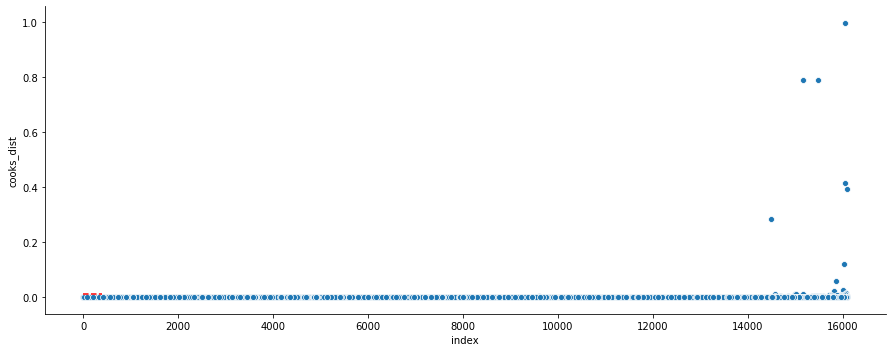

In [179]:
sns.relplot(x='index',y='cooks_dist',data=summary_frame,aspect=2.5)
plt.plot([0,400],[0.009,0.009],'r--')

In [180]:
outliers_index=summary_frame[summary_frame['cooks_dist']>0.001]['index'].values
outliers_index

array([14499, 15389, 14695, 15361, 15325, 16068, 15860, 15852, 16069,
       14522, 15789, 15102, 15167, 16001, 16024, 16071, 15362, 15351,
       15583, 15000, 16093, 15468, 16080, 15831, 15779, 15785, 15162,
       15945, 15678, 16051, 15426, 15851, 10065, 15811, 15526, 15474,
       14678, 16100, 16041, 15459, 15719, 14699, 14860, 16092, 15820,
       16066, 15166, 16099, 15197, 16067, 14570, 16096, 15229, 15775,
       16098, 15928, 13503, 14335, 15817, 15844, 15518, 16078, 15763,
       14566, 16075, 14587, 15861, 14687, 15103, 15765, 15962, 15766,
        9613, 16101, 16043, 16034, 15018, 15916, 15015, 15946, 14905,
       15879, 15124, 16084, 16097, 15135, 14941, 16035, 16006, 16026],
      dtype=int64)

In [181]:
x_train_new=x_train
y_train_new=y_train

In [182]:
model_new= LinearRegression()
model_new.fit(x_train_new,y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
model.score(x_test,y_test)

0.6425130998402657

In [186]:
model_new.score(x_test,y_test)

0.6425130998402657